# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [6]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.svm import l1_min_c

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [8]:
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [9]:
df.shape

(32561, 15)

In [10]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [11]:
df_summ_all = df.describe(include='all')
df_summ_all

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
df.drop(labels='fnlwgt', axis=1, inplace=True)

X = df
print(str(list(X.columns)))

['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary']


In [13]:
df['label_income_binary'] = df['income_binary']

condition1 = (df['label_income_binary'] == '>50K')
df['label_income_binary'] = np.where(condition1, 'True', df['label_income_binary'])

condition2 = (df['label_income_binary'] == '<=50K')
df['label_income_binary'] = np.where(condition2, 'False', df['label_income_binary'])

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label_income_binary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False


In [14]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                     162
workclass              1836
education                 0
education-num             0
marital-status            0
occupation             1843
relationship              0
race                      0
sex_selfID                0
capital-gain              0
capital-loss              0
hours-per-week          325
native-country          583
income_binary             0
label_income_binary       0
dtype: int64

In [15]:
df['age_na'] = df['age'].isnull()
mean_ages = df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)

df['hours-per-week_na'] = df['hours-per-week'].isnull()
mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

In [16]:
df.fillna("Others", inplace=True, axis = 1)
df.head(15)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label_income_binary,age_na,hours-per-week_na
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False,False
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False,False
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,False
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False,False
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False,False
5,37.0,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,False,False,False
6,49.0,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K,False,False,False
7,52.0,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K,True,False,False
8,31.0,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K,True,False,False
9,42.0,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K,True,False,False


In [50]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

label_income_binary          0
age_17.0                     0
age_18.0                     0
age_19.0                     0
age_20.0                     0
                            ..
native-country_Yugoslavia    0
age_na_False                 0
age_na_True                  0
hours-per-week_na_False      0
hours-per-week_na_True       0
Length: 490, dtype: int64

In [17]:
# addressing class imbalance
num_rows = df.shape[0]
indices = np.random.choice(df.index, size=int(num_rows * 0.3), replace=False)
df_subset = df.loc[indices]
print(df.shape)
print(df_subset.shape)
print(df['sex_selfID'].unique())

(32561, 17)
(9768, 17)
['Non-Female' 'Female']


In [18]:
ssID_counts = df_subset['sex_selfID'].value_counts()
print(ssID_counts)

ssID_counts['Female'] / sum(ssID_counts.values)

Non-Female    6571
Female        3197
Name: sex_selfID, dtype: int64


0.3272932022932023

In [19]:
race_counts = df_subset['race'].value_counts()
print(race_counts)

White                 8381
Black                  915
Asian-Pac-Islander     308
Amer-Indian-Inuit       90
Other                   74
Name: race, dtype: int64


In [20]:
print(df_subset.groupby(['sex_selfID', 'income_binary']).size())

low_nf, high_nf = df_subset.groupby(['sex_selfID', 'income_binary']).size()['Non-Female']
class_balance_nf = high_nf / low_nf

low_f, high_f = df_subset.groupby(['sex_selfID', 'income_binary']).size()['Female']

add_ss = int(class_balance_nf * low_f - high_f)
add_ss

sex_selfID  income_binary
Female      <=50K            2829
            >50K              368
Non-Female  <=50K            4529
            >50K             2042
dtype: int64


907

In [21]:
df_never_sampled = df.drop(labels=df_subset.index, axis=0, inplace=False)

upsample = (df_never_sampled['income_binary'] == '>50K') & (df_never_sampled['sex_selfID'] == 'Female')
df_ns_target = df_never_sampled[upsample]

size = min(add_ss, df_ns_target.shape[0])
indices = np.random.choice(df_ns_target.index, size=size, replace=False)

df_balanced_subset = df_subset.append(df.loc[indices])
df_balanced_subset.head()

/tmp/ipykernel_4549/2660585522.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_subset = df_subset.append(df.loc[indices])


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label_income_binary,age_na,hours-per-week_na
27411,43.0,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Non-Female,7688,0,40.0,United-States,>50K,True,False,False
3710,27.0,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Non-Female,4416,0,40.0,United-States,<=50K,False,False,False
16676,33.0,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,Black,Non-Female,0,0,55.0,United-States,<=50K,False,False,False
21554,29.0,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45.0,United-States,>50K,True,False,False
1389,17.0,Private,11th,7,Never-married,Other-service,Own-child,White,Non-Female,0,0,5.0,United-States,<=50K,False,False,False


In [22]:
df = df.drop('income_binary', axis=1)

In [23]:
df_balanced_subset.groupby(['sex_selfID', 'label_income_binary']).size()

sex_selfID  label_income_binary
Female      False                  2829
            True                   1179
Non-Female  False                  4529
            True                   2042
dtype: int64

In [24]:
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode.remove('label_income_binary')

In [27]:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.columns = encoder.get_feature_names_out(to_encode)

df_enc.head()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age_17.0,age_18.0,age_19.0,age_20.0,age_21.0,age_22.0,age_23.0,age_24.0,age_25.0,age_26.0,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age_na_False,age_na_True,hours-per-week_na_False,hours-per-week_na_True
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [28]:
df = df.join(df_enc)
df.drop(columns=to_encode, axis=1, inplace=True)

In [29]:
df.shape

(32561, 490)

In [30]:
df.dtypes

label_income_binary           object
age_17.0                     float64
age_18.0                     float64
age_19.0                     float64
age_20.0                     float64
                              ...   
native-country_Yugoslavia    float64
age_na_False                 float64
age_na_True                  float64
hours-per-week_na_False      float64
hours-per-week_na_True       float64
Length: 490, dtype: object

In [31]:
df.head()

,label_income_binary,age_17.0,age_18.0,age_19.0,age_20.0,age_21.0,age_22.0,age_23.0,age_24.0,age_25.0,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age_na_False,age_na_True,hours-per-week_na_False,hours-per-week_na_True
0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [51]:
feature_list = list(df.select_dtypes("float64", "int64"))

In [52]:
y = df['label_income_binary']
X = df[feature_list]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [35]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(C=c, max_iter=10000)
    
    model.fit(X_train, y_train)
    
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return l_loss, acc_score

loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.2942579930989098
Accuracy: 0.8643668748080663


In [36]:
cs = [10**i for i in range(-10,10)]
ll_cs = list()
acc_cs = list()

for i in cs:
    loss, acc = train_test_LR(X_train, y_train, X_test, y_test, i)
    ll_cs.append(loss)
    acc_cs.append(acc)

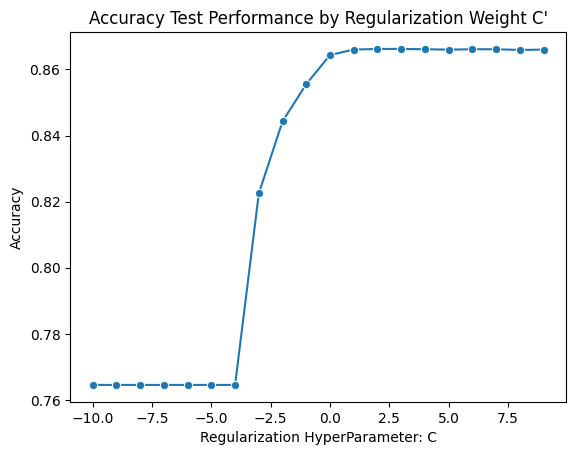

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

In [38]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [39]:
proba_predictions = model.predict_proba(X_test)[:, 1]
class_label_predictions = model.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, class_label_predictions, labels=['True','False'])
df_cm = pd.DataFrame(cm, columns=['Predicted: Income is >$50K', 'Predicted: Income is <=$50K'],
                                 index=['Actual: Income is >$50K', 'Actual: Income is <=$50K'])
df_cm

,Predicted: Income is >$50K,Predicted: Income is <=$50K
Actual: Income is >$50K,1444,856
Actual: Income is <=$50K,469,7000


In [41]:
cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C=list(cs))
param_grid

{'C': [0.00016431153466973383,
  0.0004812100829157471,
  0.0014092932937740622,
  0.004127319144774203,
  0.012087450779816652,
  0.035399847026485125,
  0.10367356958268042,
  0.30362303605361335,
  0.8892039542334272,
  2.6041623274089947,
  7.62666584556816,
  22.335793474836134,
  65.41360015667054,
  191.57318455140177,
  561.0497656644103,
  1643.1153466973383]}

In [42]:
print('Running Grid Search...')

model = LogisticRegression(max_iter=10000)
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...


Done


In [43]:
best_c = grid_search.best_params_['C']

model_best = LogisticRegression(C=best_c, max_iter=10000)
model_best.fit(X_train, y_train)

proba_predictions_best = model_best.predict_proba(X_test)[:, 1]
class_label_predictions_best = model_best.predict(X_test)

In [44]:
cm_best = confusion_matrix(y_test, class_label_predictions_best, labels=['True','False'])
df_cm_best = pd.DataFrame(cm_best, columns=['Predicted: Income is >$50K', 'Predicted: Income is <=$50K'],
                                 index=['Actual: Income is >$50K', 'Actual: Income is <=$50K'])
df_cm_best

,Predicted: Income is >$50K,Predicted: Income is <=$50K
Actual: Income is >$50K,1481,819
Actual: Income is <=$50K,488,6981


In [45]:
y_test = y_test.map({'True': 1, 'False': 0}).astype(int)
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

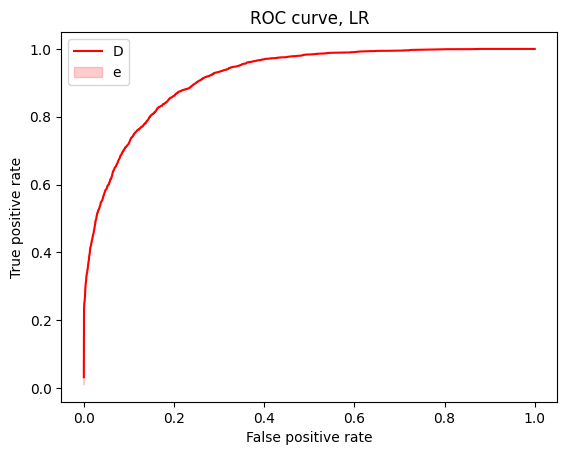

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr, y=tpr, color='r')

plt.title("ROC curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend("Default hyperparameter")
plt.show()

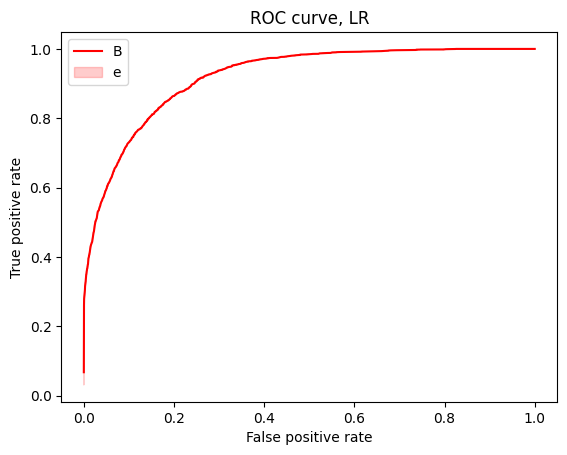

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_best, y=tpr_best, color='r')

plt.title("ROC curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend("Best hyperparameter")
plt.show()